In [21]:
from mu2e import mu2e_ext_path
import pandas as pd
from mu2e.mu2eplots import mu2e_plot3d_ptrap
from mu2e.mu2eplots import mu2e_plot3d_ptrap_anim
import cPickle as pkl
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,8)

In [59]:
#df_nttvd, df_ntpart = pkl.load(open(mu2e_ext_path+'datafiles/G4ParticleSim/z13k_ft_muons_GA05.p','rb'))
store = pd.HDFStore(mu2e_ext_path+'datafiles/G4ParticleSim/iso_muons_allp_GA05.h5')
df_nttvd = store.df_nttvd
df_ntpart = store.df_ntpart
store_xray = pd.HDFStore(mu2e_ext_path+'datafiles/G4ParticleSim/low_e_ele.h5')
df_xray = store_xray.df_ntpart

store.close()
store_xray.close()


In [64]:
len(df_ntpart.query('xstop<1000 and tstop>9999 and sqrt(xstop*xstop+ystop*ystop)<900 and 4000<zstop<14000 and pdg==13 and pstop>20'))

27532

In [63]:
mu2e_plot3d_ptrap(df_ntpart.query('xstop<1000 and tstop>9999 and sqrt(xstop*xstop+ystop*ystop)<900 and 4000<zstop<14000 and pdg==13 and pstop>20').reset_index().ix[0:10000],
                  'zstop','xstop','ystop', x_range=[3700,17500], y_range = [-1000,1000], z_range=[-1000,1000],
                  mode='plotly_nb', df_xray=df_xray, color='pstop')

binning...
binned


In [ ]:
mu2e_plot3d_ptrap(df_xray.query('xstop<1000 and tstop<200 and sqrt(xstop*xstop+ystop*ystop)<900 and 4000<zstop<14000'),
                  'zstop','xstop','ystop', mode='plotly_nb')

In [3]:
df_nttvd_oldest = df_nttvd[(df_nttvd.runevt.isin(df_nttvd[df_nttvd.sid==df_nttvd.sid.max()].runevt))&(df_nttvd.pdg==13.0)]
df_nttvd_normal = df_nttvd[(~df_nttvd.runevt.isin(df_nttvd_oldest.runevt))&(df_nttvd.z>5000)&(df_nttvd.pdg==13.0)].sort_values(['runevt','sid']).ix[0:20000]

In [4]:
df_nttvd_normal.name='Normal Muons'
df_nttvd_oldest.name='Long-lived Muons'

In [6]:
g, fig = mu2e_plot3d_ptrap_anim(df_nttvd_normal,'z','x','y',df_xray,
                                df_group2=df_nttvd_oldest, color=True,title='GA05 Trapped Muons')

binning...
binned


In [7]:
g.plot(fig)

In [ ]:
g.save('particle_save')

In [ ]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,8)
df_nttvd_oldest.z.hist(bins=40)

In [ ]:
df_nttvd_normal[df_nttvd_normal.sid==1].pz.hist(bins=40)

In [ ]:
sort(df_nttvd_normal.p.unique())

In [ ]:
sqrt(56.191128**2+92.163254**2+0.036695**2)

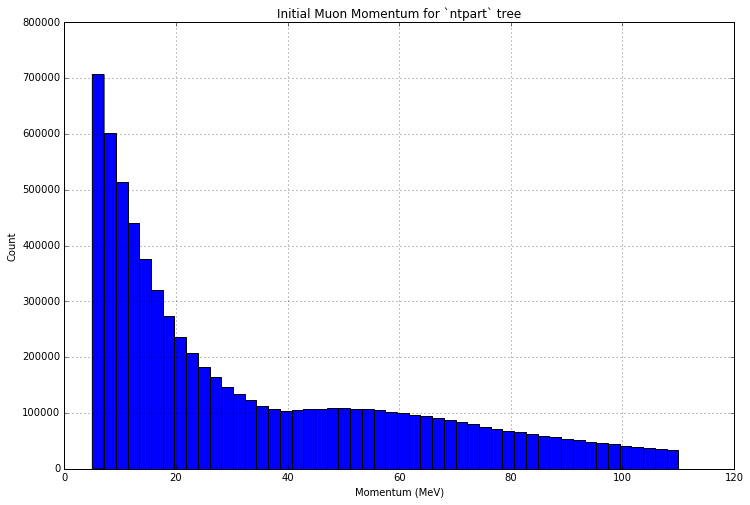

In [29]:
df_ntpart.p.hist(bins=50)
plt.xlabel('Momentum (MeV)')
plt.ylabel('Count')
plt.title('Initial Muon Momentum for `ntpart` tree')